In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = {
    'Processor_Speed_GHz': [2.1, 2.5, 2.8, 3.0, 2.2, 3.1, 2.9, 3.3],
    'RAM_GB': [4, 8, 8, 16, 4, 16, 12, 16],
    'Storage_SSD_GB': [128, 256, 512, 512, 256, 1024, 512, 1024],
    'Battery_Life_Hours': [5, 6, 7, 8, 6, 10, 8, 12],
    'Benchmark_Score': [2300, 3100, 3600, 4000, 2500, 4500, 3900, 4700]
}

In [11]:
df = pd.DataFrame(data)
print(df)

   Processor_Speed_GHz  RAM_GB  Storage_SSD_GB  Battery_Life_Hours  \
0                  2.1       4             128                   5   
1                  2.5       8             256                   6   
2                  2.8       8             512                   7   
3                  3.0      16             512                   8   
4                  2.2       4             256                   6   
5                  3.1      16            1024                  10   
6                  2.9      12             512                   8   
7                  3.3      16            1024                  12   

   Benchmark_Score  
0             2300  
1             3100  
2             3600  
3             4000  
4             2500  
5             4500  
6             3900  
7             4700  


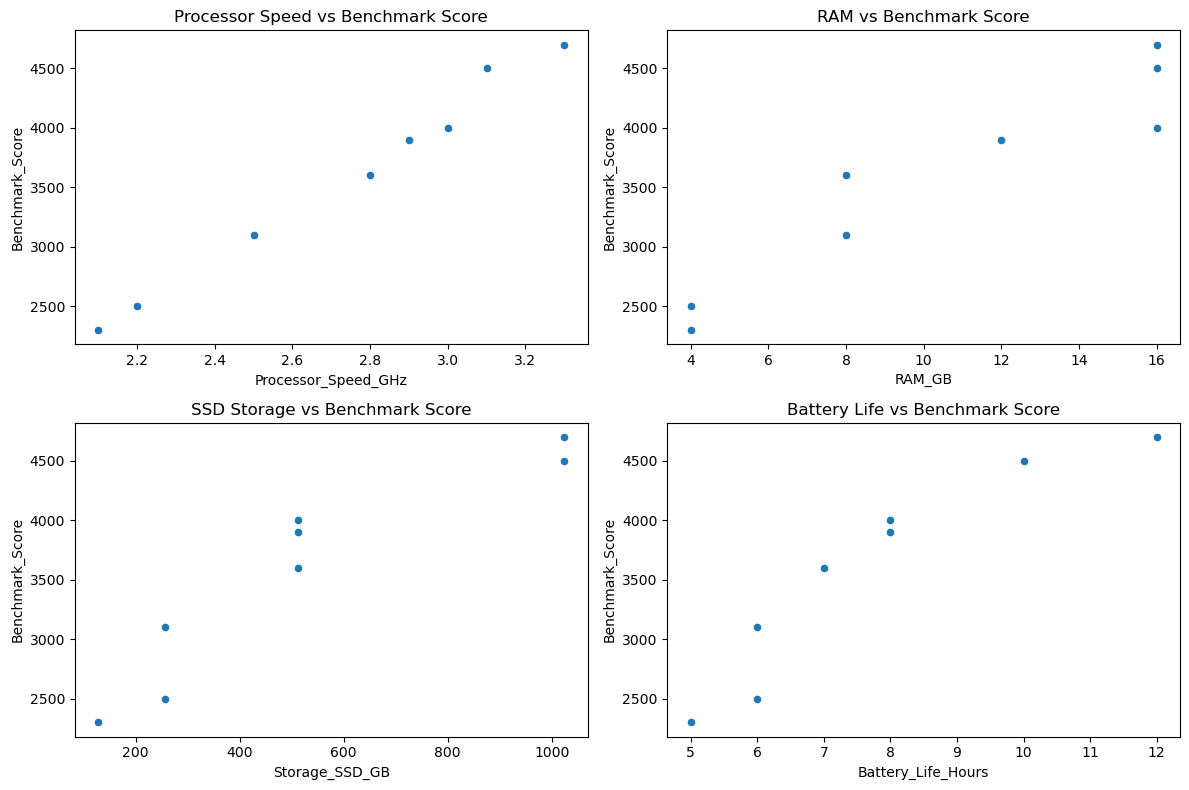

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.scatterplot(x="Processor_Speed_GHz", y="Benchmark_Score", data=df, ax=axes[0, 0])
axes[0, 0].set_title("Processor Speed vs Benchmark Score")

sns.scatterplot(x="RAM_GB", y="Benchmark_Score", data=df, ax=axes[0, 1])
axes[0, 1].set_title("RAM vs Benchmark Score")

sns.scatterplot(x="Storage_SSD_GB", y="Benchmark_Score", data=df, ax=axes[1, 0])
axes[1, 0].set_title("SSD Storage vs Benchmark Score")

sns.scatterplot(x="Battery_Life_Hours", y="Benchmark_Score", data=df, ax=axes[1, 1])
axes[1, 1].set_title("Battery Life vs Benchmark Score")

plt.tight_layout()
plt.show()

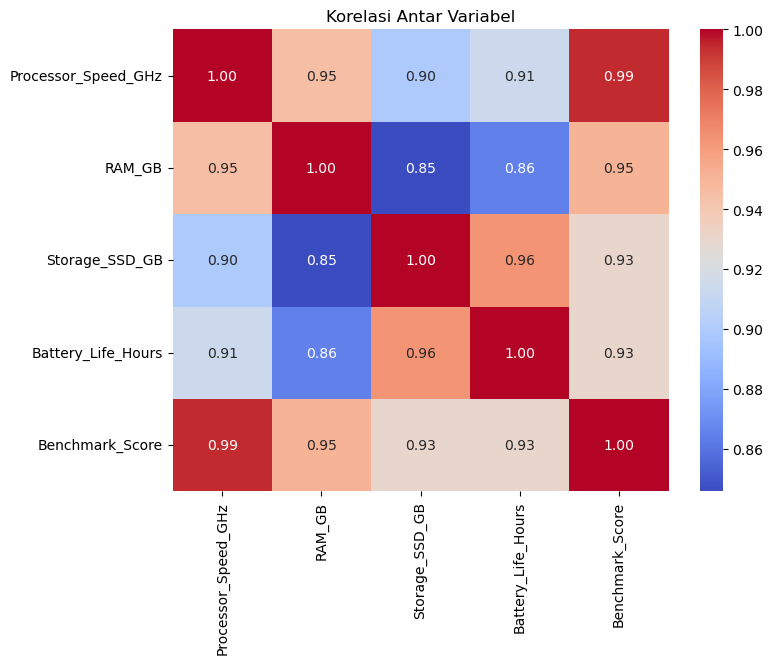

In [15]:
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Variabel")
plt.show()

In [26]:
from sklearn.linear_model import LinearRegression

for iv in ["Processor_Speed_GHz","RAM_GB","Storage_SSD_GB","Battery_Life_Hours"]:
    X = df[[iv]]
    Y = df["Benchmark_Score"]
    
    model = LinearRegression()
    model.fit(X, Y)
    
    print(f"Regresi untuk {iv}:")
    print(f"Intercept: {model.intercept_:.2f}")
    print(f"Slope: {model.coef_[0]:.2f}")
    print("="*30)

Regresi untuk Processor_Speed_GHz:
Intercept: -1984.31
Slope: 2030.80
Regresi untuk RAM_GB:
Intercept: 1889.47
Slope: 160.53
Regresi untuk Storage_SSD_GB:
Intercept: 2298.47
Slope: 2.42
Regresi untuk Battery_Life_Hours:
Intercept: 836.67
Slope: 353.33


In [28]:
from sklearn.metrics import mean_squared_error
X = df[['Processor_Speed_GHz', 'RAM_GB', 'Storage_SSD_GB', 'Battery_Life_Hours']]  # Variabel independen
Y = df['Benchmark_Score']  # Variabel dependen

# Membuat model regresi
model = LinearRegression()

# Melatih model
model.fit(X, Y)

# Prediksi nilai Benchmark_Score
Y_pred = model.predict(X)

# Menampilkan intercept dan slopes
print(f"Intercept: {model.intercept_:.2f}")
print(f"Slopes: {model.coef_}")

# Evaluasi model
r2_score = model.score(X, Y)  # Koefisien determinasi (R²)
print(f"R² Score: {r2_score:.2f}")

# Mean Squared Error (MSE)
mse = mean_squared_error(Y, Y_pred)
print(f"MSE Score: {mse:.2f}")

Intercept: -854.54
Slopes: [ 1.51724138e+03  1.88294011e+01  6.69237750e-01 -3.54809437e+01]
R² Score: 1.00
MSE Score: 1682.17
